# Datasets : 
### https://drive.google.com/drive/folders/1yFa7EGLwXOgL-dJV5_wvKDCO1LJ9XTTz?usp=sharing

# Description of Imported Libraries

- **NumPy (`np`)**: Used for efficient numerical operations, including linear algebra and array manipulation.
- **Pandas (`pd`)**: Provides data structures like DataFrames for handling structured data, essential for data preprocessing.
- **Polars (`pl`)**: A faster alternative to pandas for DataFrame operations, particularly useful for large datasets.
- **Matplotlib & Seaborn (`plt`, `sns`)**: Visualization libraries. Matplotlib is used for basic plots, while Seaborn builds on it to create more advanced statistical visualizations.
- **LightGBM, XGBoost, CatBoost**: Machine learning libraries used for gradient boosting, which is efficient for both regression and classification tasks.
- **Colorama**: Enhances console output with colored text, making it easier to highlight important results or warnings.
- **SciPy (`minimize`)**: Provides optimization routines, such as adjusting thresholds to maximize performance metrics like kappa scores.
- **OS**: Used for file path manipulations and system-related functions.
- **Scikit-learn (`sklearn`)**: A powerful machine learning library, providing utilities for cross-validation, metrics, and model cloning.
- **YDF**: A specialized library for machine learning tasks, likely including decision forests.
- **ThreadPoolExecutor & TQDM**: Tools for parallelizing tasks and displaying progress bars for long-running loops, improving efficiency and usability.
- **Warnings**: Filters out unwanted warnings to keep the output clean, useful when dealing with noisy outputs from multiple libraries.
- **IPython display (`clear_output`)**: A utility for clearing the Jupyter notebook output, often used to avoid clutter in long-running scripts.


In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 916.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor
import torch

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import os
import re
from sklearn.base import clone
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import StratifiedKFold
from scipy.optimize import minimize
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
import torch
import torch.nn as nn
import torch.optim as optim

from colorama import Fore, Style
from IPython.display import clear_output
import warnings
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/My Drive/child-mind-institute-problematic-internet-use"

In [ ]:
target_labels = ['None', 'Mild', 'Moderate', 'Severe']

In [ ]:
season_dtype = pl.Enum(['Spring', 'Summer', 'Fall', 'Winter'])

train = (
    pl.read_csv('/content/drive/My Drive/child-mind-institute-problematic-internet-use/train.csv')
    .with_columns(pl.col('^.*Season$').cast(season_dtype))
)

test = (
    pl.read_csv('/content/drive/My Drive/child-mind-institute-problematic-internet-use/test.csv')
    .with_columns(pl.col('^.*Season$').cast(season_dtype))
)

train
test

id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
str,enum,i64,i64,enum,i64,enum,f64,f64,f64,f64,i64,i64,i64,enum,i64,i64,i64,enum,i64,i64,f64,i64,f64,i64,i64,i64,f64,i64,f64,i64,f64,i64,enum,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,enum,f64,enum,f64,enum,i64,i64,enum,i64
"""00008ff9""","""Fall""",5,0,"""Winter""",51,"""Fall""",16.877316,46.0,50.8,null,null,null,null,null,null,null,null,"""Fall""",0,0,null,null,null,null,0,0,7.0,0,6.0,0,6.0,1,"""Fall""",2,2.66855,16.8792,932.498,1492.0,8.25598,41.5862,13.8177,3.06143,9.21377,1,24.4349,8.89536,38.9177,19.5413,32.6909,null,null,null,null,null,null,null,"""Fall""",3
"""000fd460""","""Summer""",9,0,null,null,"""Fall""",14.03559,48.0,46.0,22.0,75,70,122,null,null,null,null,"""Fall""",3,0,null,null,null,null,5,0,11.0,1,11.0,1,3.0,0,"""Winter""",2,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1,21.0352,14.974,39.4497,15.4107,27.0552,null,null,"""Fall""",2.34,"""Fall""",46,64,"""Summer""",0
"""00105258""","""Summer""",10,1,"""Fall""",71,"""Fall""",16.648696,56.5,75.6,null,65,94,117,"""Fall""",5,7,33,"""Fall""",20,1,10.2,1,14.7,2,7,1,10.0,1,10.0,1,5.0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Summer""",2.17,"""Fall""",38,54,"""Summer""",2
"""00115b9f""","""Winter""",9,0,"""Fall""",71,"""Summer""",18.292347,56.0,81.6,null,60,97,117,"""Summer""",6,9,37,"""Summer""",18,1,null,null,null,null,5,0,7.0,0,7.0,0,7.0,1,"""Summer""",3,3.84191,18.2943,1131.43,1923.44,15.5925,62.7757,14.074,4.22033,18.8243,2,30.4041,16.779,58.9338,26.4798,45.9966,null,null,"""Winter""",2.451,"""Summer""",31,45,"""Winter""",0
"""0016bb22""","""Spring""",18,1,"""Summer""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Summer""",1.04,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""00c0cd71""","""Winter""",7,0,"""Summer""",51,"""Spring""",29.315775,54.0,121.6,null,80,75,99,"""Spring""",4,5,32,"""Spring""",6,1,null,null,null,null,0,0,12.0,1,15.0,1,12.0,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Spring""",35,50,"""Winter""",2
"""00d56d4b""","""Spring""",5,1,"""Summer""",80,"""Spring""",17.284504,44.0,47.6,null,61,76,109,"""Spring""",null,null,null,"""Spring""",0,0,null,null,null,null,0,0,10.5,1,10.0,1,7.0,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Spring""",37,53,"""Spring""",0
"""00d9913d""","""Fall""",10,1,null,null,"""Fall""",19.893157,55.0,85.6,30.0,null,81,null,null,null,null,null,"""Fall""",5,0,null,null,null,null,0,0,0.0,0,0.0,0,9.0,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Fall""",1


For a supervised learning, we need the target value, but some (sii) are missing. So we only use the part with valid target value(sii).

In [ ]:
supervised_usable = (
    train
    .filter(pl.col('sii').is_not_null())
)

missing_count = (
    supervised_usable
    .null_count()
    .transpose(include_header=True,
               header_name='feature',
               column_names=['null_count'])
    .sort('null_count', descending=True)
    .with_columns((pl.col('null_count') / len(supervised_usable)).alias('null_ratio'))
)

In [ ]:
print(train.select(pl.col('PCIAT-PCIAT_Total').is_null() == pl.col('sii').is_null()).to_series().mean())

(train
 .select(pl.col('PCIAT-PCIAT_Total'))
 .group_by(train.get_column('sii'))
 .agg(pl.col('PCIAT-PCIAT_Total').min().alias('PCIAT-PCIAT_Total min'),
      pl.col('PCIAT-PCIAT_Total').max().alias('PCIAT-PCIAT_Total max'),
      pl.col('PCIAT-PCIAT_Total').len().alias('count'))
 .sort('sii')
)

1.0


sii,PCIAT-PCIAT_Total min,PCIAT-PCIAT_Total max,count
i64,i64,i64,u32
null,null,null,1224
0,0,30,1594
1,31,49,730
2,50,79,378
3,80,93,34


**Insight:**

This dataset is imbalanced. Half of the samples are in class 0, while very few in class 3.


In [ ]:
print('Columns missing in test:')
print([f for f in train.columns if f not in test.columns])

Columns missing in test:
['PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total', 'sii']


# Demographics


Now we look at some basic demographics.

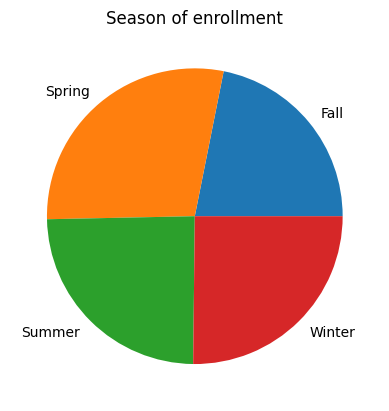

In [ ]:
vc = train.get_column('Basic_Demos-Enroll_Season').value_counts()
plt.pie(vc.get_column('count'), labels=vc.get_column('Basic_Demos-Enroll_Season'))
plt.title('Season of enrollment')
plt.show()

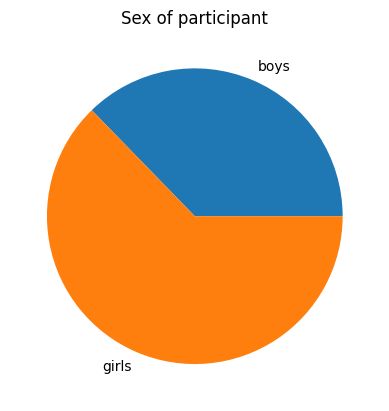

In [ ]:
vc = train.get_column('Basic_Demos-Sex').value_counts()
plt.pie(vc.get_column('count'), labels=['boys', 'girls'])
plt.title('Sex of participant')
plt.show()

# Now we look at correlations

Basic_Demos-Age                           0.409559
Physical-BMI                              0.240858
Physical-Height                           0.420765
Physical-Weight                           0.353048
Physical-Waist_Circumference              0.327013
Physical-Systolic_BP                      0.147081
PreInt_EduHx-computerinternet_hoursday    0.374124
SDS-SDS_Total_T                           0.237718
FGC-FGC_CU                                0.287494
FGC-FGC_GSND                              0.146813
FGC-FGC_GSD                               0.160472
FGC-FGC_PU                                0.196006
FGC-FGC_TL                                0.136696
BIA-BIA_BMI                               0.248060
BIA-BIA_FFMI                              0.109694
BIA-BIA_Frame_num                         0.193631
Name: PCIAT-PCIAT_Total, dtype: float64


<Figure size 1400x1200 with 0 Axes>

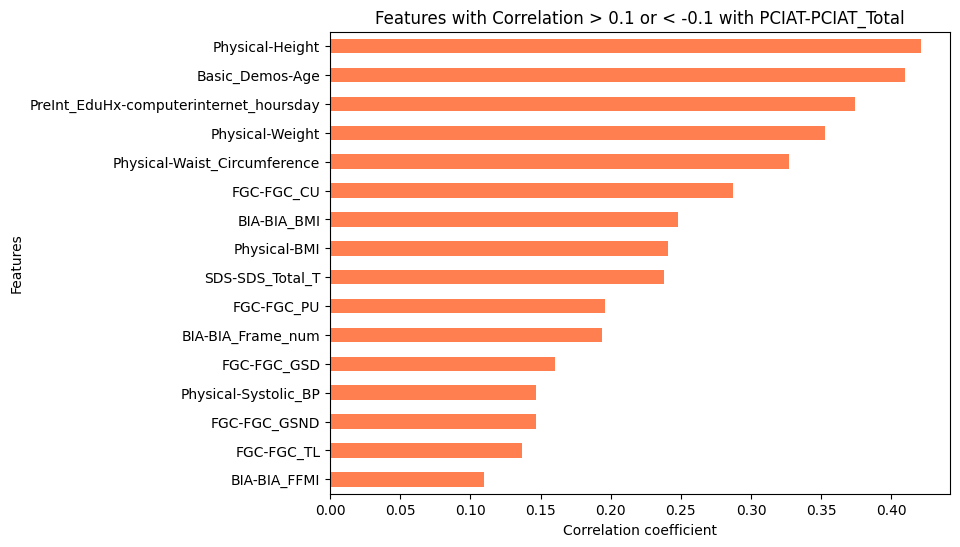

In [ ]:
plt.figure(figsize=(14, 12))
corr_matrix = supervised_usable.select([
    'PCIAT-PCIAT_Total', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'Physical-BMI',
    'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
    'Physical-Diastolic_BP', 'Physical-Systolic_BP', 'Physical-HeartRate',
    'PreInt_EduHx-computerinternet_hoursday', 'SDS-SDS_Total_T', 'PAQ_A-PAQ_A_Total',
    'PAQ_C-PAQ_C_Total', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins','Fitness_Endurance-Time_Sec',
    'FGC-FGC_CU', 'FGC-FGC_GSND','FGC-FGC_GSD','FGC-FGC_PU','FGC-FGC_SRL','FGC-FGC_SRR','FGC-FGC_TL','BIA-BIA_Activity_Level_num',
    'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
    'BIA-BIA_FFMI','BIA-BIA_FMI', 'BIA-BIA_Fat','BIA-BIA_Frame_num','BIA-BIA_ICW','BIA-BIA_LDM','BIA-BIA_LST',
    'BIA-BIA_SMM','BIA-BIA_TBW'
    # Add other relevant columns
]).to_pandas().corr()

sii_corr = corr_matrix['PCIAT-PCIAT_Total'].drop('PCIAT-PCIAT_Total')
filtered_corr = sii_corr[(sii_corr > 0.1) | (sii_corr < -0.1)]

print(filtered_corr)

plt.figure(figsize=(8, 6))
filtered_corr.sort_values().plot(kind='barh', color='coral')
plt.title('Features with Correlation > 0.1 or < -0.1 with PCIAT-PCIAT_Total')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')
plt.show()

# Actigraphy (time series)

In [ ]:
actigraphy = pl.read_parquet('/content/drive/My Drive/child-mind-institute-problematic-internet-use/series_train.parquet/id=0417c91e/part-0.parquet')
actigraphy

step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT
u32,f32,f32,f32,f32,f32,f32,f32,f32,i64,i8,i8,f32
0,0.014375,-0.020112,-0.995358,0.00106,-88.445251,0.0,41.0,4195.0,44100000000000,2,2,5.0
1,0.014167,-0.023278,-0.996164,0.000289,-88.3722,0.0,41.0,4194.833496,44105000000000,2,2,5.0
2,0.014036,-0.022964,-0.99632,0.000301,-88.356422,0.0,41.5,4194.666504,44110000000000,2,2,5.0
3,0.013593,-0.022048,-0.996762,0.002278,-88.575943,0.0,37.5,4194.5,44115000000000,2,2,5.0
4,-0.061772,-0.065317,-0.973063,0.092321,-88.391273,0.0,55.666668,4199.0,44780000000000,2,2,5.0
…,…,…,…,…,…,…,…,…,…,…,…,…
287174,-0.407433,0.091612,-0.377763,0.039733,-43.319416,0.0,7.0,3695.0,32875000000000,1,3,53.0
287175,-0.703572,0.016187,0.15956,0.03598,14.12139,0.0,7.0,3695.0,32880000000000,1,3,53.0
287176,-0.209607,-0.4697,0.636573,0.097799,44.998573,0.0,7.0,3695.0,32885000000000,1,3,53.0


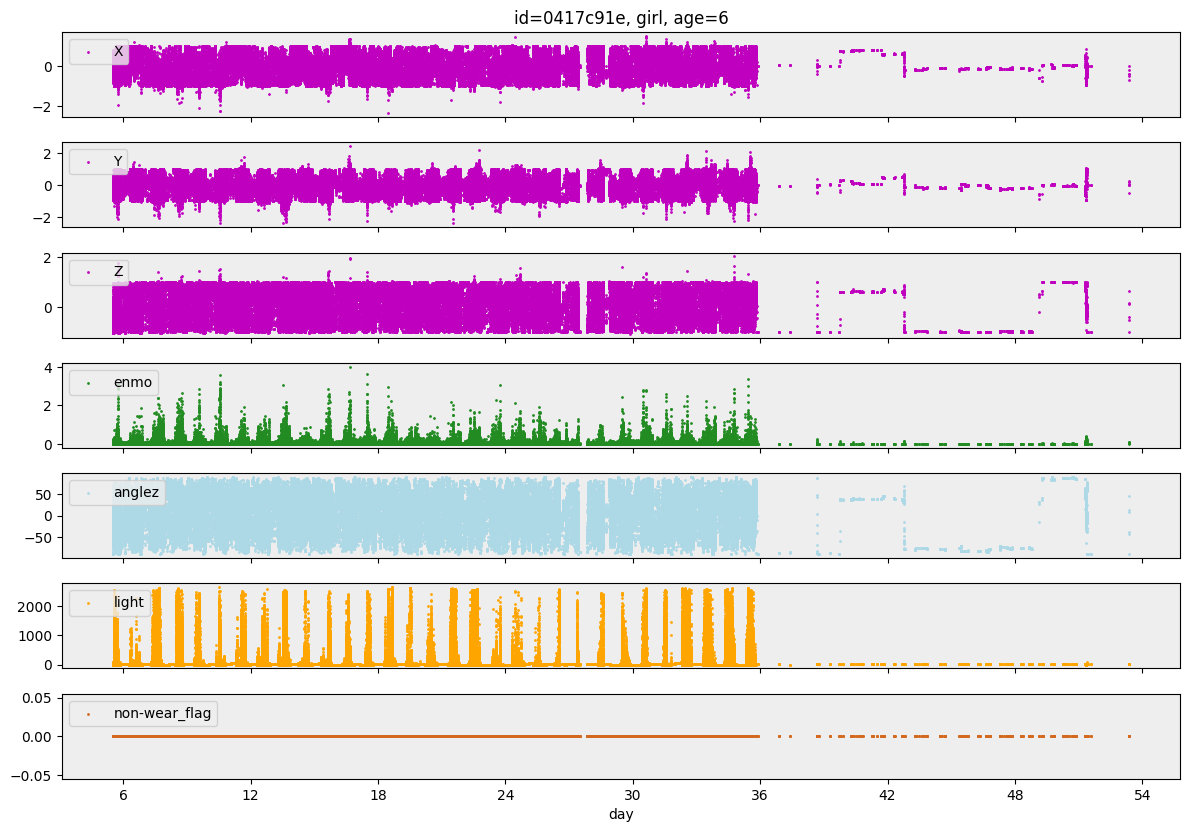

In [ ]:
def analyze_actigraphy(id, only_one_week=False, small=False):
    actigraphy = pl.read_parquet(f'/content/drive/My Drive/child-mind-institute-problematic-internet-use/series_train.parquet/id={id}/part-0.parquet')
    day = actigraphy.get_column('relative_date_PCIAT') + actigraphy.get_column('time_of_day') / 86400e9
    sample = train.filter(pl.col('id') == id)
    age = sample.get_column('Basic_Demos-Age').item()
    sex = ['boy', 'girl'][sample.get_column('Basic_Demos-Sex').item()]
    actigraphy = (
        actigraphy
        .with_columns(
            (day.diff() * 86400).alias('diff_seconds'),
            (np.sqrt(np.square(pl.col('X')) + np.square(pl.col('Y')) + np.square(pl.col('Z'))).alias('norm'))
        )
    )

    if only_one_week:
        start = np.ceil(day.min())
        mask = (start <= day.to_numpy()) & (day.to_numpy() <= start + 7*3)
        mask &= ~ actigraphy.get_column('non-wear_flag').cast(bool).to_numpy()
    else:
        mask = np.full(len(day), True)

    if small:
        timelines = [
            ('enmo', 'forestgreen'),
            ('light', 'orange'),
        ]
    else:
        timelines = [
            ('X', 'm'),
            ('Y', 'm'),
            ('Z', 'm'),
#             ('norm', 'c'),
            ('enmo', 'forestgreen'),
            ('anglez', 'lightblue'),
            ('light', 'orange'),
            ('non-wear_flag', 'chocolate')
    #         ('diff_seconds', 'k'),
        ]

    _, axs = plt.subplots(len(timelines), 1, sharex=True, figsize=(12, len(timelines) * 1.1 + 0.5))
    for ax, (feature, color) in zip(axs, timelines):
        ax.set_facecolor('#eeeeee')
        ax.scatter(day.to_numpy()[mask],
                   actigraphy.get_column(feature).to_numpy()[mask],
                   color=color, label=feature, s=1)
        ax.legend(loc='upper left', facecolor='#eeeeee')
        if feature == 'diff_seconds':
            ax.set_ylim(-0.5, 20.5)
    axs[-1].set_xlabel('day')
    axs[-1].xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.tight_layout()
    axs[0].set_title(f'id={id}, {sex}, age={age}')
    plt.show()

analyze_actigraphy('0417c91e', only_one_week=False)

In [ ]:
SEED = 42
n_splits = 5

# Feature Engineering

- **Feature Selection**: The dataset contains features related to physical characteristics (e.g., BMI, Height, Weight), behavioral aspects (e.g., internet usage), and fitness data (e.g., endurance time).
- **Categorical Feature Encoding**: Categorical features are mapped to numerical values using custom mappings for each unique category within the dataset. This ensures compatibility with machine learning algorithms that require numerical input.
- **Time Series Aggregation**: Time series statistics (e.g., mean, standard deviation) from the actigraphy data are computed and merged into the main dataset to create additional features for model training.


In [ ]:
def process_file(filename, dirname):
    df = pd.read_parquet(os.path.join(dirname, filename, 'part-0.parquet'))
    df.drop('step', axis=1, inplace=True)
    return df.describe().values.reshape(-1), filename.split('=')[1]

def load_time_series(dirname) -> pd.DataFrame:
    ids = os.listdir(dirname)

    with ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(lambda fname: process_file(fname, dirname), ids), total=len(ids)))

    stats, indexes = zip(*results)

    df = pd.DataFrame(stats, columns=[f"stat_{i}" for i in range(len(stats[0]))])
    df['id'] = indexes
    return df


class AutoEncoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim*3),
            nn.ReLU(),
            nn.Linear(encoding_dim*3, encoding_dim*2),
            nn.ReLU(),
            nn.Linear(encoding_dim*2, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim*2),
            nn.ReLU(),
            nn.Linear(input_dim*2, input_dim*3),
            nn.ReLU(),
            nn.Linear(input_dim*3, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


def perform_autoencoder(df, encoding_dim=50, epochs=50, batch_size=32):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)

    data_tensor = torch.FloatTensor(df_scaled)

    input_dim = data_tensor.shape[1]
    autoencoder = AutoEncoder(input_dim, encoding_dim)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters())

    for epoch in range(epochs):
        for i in range(0, len(data_tensor), batch_size):
            batch = data_tensor[i : i + batch_size]
            optimizer.zero_grad()
            reconstructed = autoencoder(batch)
            loss = criterion(reconstructed, batch)
            loss.backward()
            optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}]')

    with torch.no_grad():
        encoded_data = autoencoder.encoder(data_tensor).numpy()

    df_encoded = pd.DataFrame(encoded_data, columns=[f'Enc_{i + 1}' for i in range(encoded_data.shape[1])])

    return df_encoded

def feature_engineering(df):
    season_cols = [col for col in df.columns if 'Season' in col]
    df = df.drop(season_cols, axis=1)
    df['BMI_Age'] = df['Physical-BMI'] * df['Basic_Demos-Age']
    df['Internet_Hours_Age'] = df['PreInt_EduHx-computerinternet_hoursday'] * df['Basic_Demos-Age']
    df['BMI_Internet_Hours'] = df['Physical-BMI'] * df['PreInt_EduHx-computerinternet_hoursday']
    df['BFP_BMI'] = df['BIA-BIA_Fat'] / df['BIA-BIA_BMI']
    df['FFMI_BFP'] = df['BIA-BIA_FFMI'] / df['BIA-BIA_Fat']
    df['FMI_BFP'] = df['BIA-BIA_FMI'] / df['BIA-BIA_Fat']
    df['LST_TBW'] = df['BIA-BIA_LST'] / df['BIA-BIA_TBW']
    df['BFP_BMR'] = df['BIA-BIA_Fat'] * df['BIA-BIA_BMR']
    df['BFP_DEE'] = df['BIA-BIA_Fat'] * df['BIA-BIA_DEE']
    df['BMR_Weight'] = df['BIA-BIA_BMR'] / df['Physical-Weight']
    df['DEE_Weight'] = df['BIA-BIA_DEE'] / df['Physical-Weight']
    df['SMM_Height'] = df['BIA-BIA_SMM'] / df['Physical-Height']
    df['Muscle_to_Fat'] = df['BIA-BIA_SMM'] / df['BIA-BIA_FMI']
    df['Hydration_Status'] = df['BIA-BIA_TBW'] / df['Physical-Weight']
    df['ICW_TBW'] = df['BIA-BIA_ICW'] / df['BIA-BIA_TBW']

    return df

In [ ]:
train = pd.read_csv('/content/drive/My Drive/child-mind-institute-problematic-internet-use/train.csv')
test = pd.read_csv('/content/drive/My Drive/child-mind-institute-problematic-internet-use/test.csv')
sample = pd.read_csv('/content/drive/My Drive/child-mind-institute-problematic-internet-use/sample_submission.csv')

train_ts = load_time_series("/content/drive/My Drive/child-mind-institute-problematic-internet-use/series_train.parquet")
test_ts = load_time_series("/content/drive/My Drive/child-mind-institute-problematic-internet-use/series_test.parquet")

df_train = train_ts.drop('id', axis=1)
df_test = test_ts.drop('id', axis=1)

train_ts_encoded = perform_autoencoder(df_train, encoding_dim=60, epochs=100, batch_size=32)
test_ts_encoded = perform_autoencoder(df_test, encoding_dim=60, epochs=100, batch_size=32)

time_series_cols = train_ts_encoded.columns.tolist()
train_ts_encoded["id"]=train_ts["id"]
test_ts_encoded['id']=test_ts["id"]

train = pd.merge(train, train_ts_encoded, how="left", on='id')
test = pd.merge(test, test_ts_encoded, how="left", on='id')

imputer = KNNImputer(n_neighbors=5)
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
imputed_data = imputer.fit_transform(train[numeric_cols])
train_imputed = pd.DataFrame(imputed_data, columns=numeric_cols)
train_imputed['sii'] = train_imputed['sii'].round().astype(int)
for col in train.columns:
    if col not in numeric_cols:
        train_imputed[col] = train[col]

train = train_imputed

train = feature_engineering(train)
train = train.dropna(thresh=10, axis=0)
test = feature_engineering(test)

train = train.drop('id', axis=1)
test  = test .drop('id', axis=1)


featuresCols = ['Basic_Demos-Age', 'Basic_Demos-Sex',
                'CGAS-CGAS_Score', 'Physical-BMI',
                'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
                'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
                'Fitness_Endurance-Max_Stage',
                'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
                'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
                'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
                'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
                'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone',
                'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
                'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
                'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
                'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
                'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total',
                'PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_Raw',
                'SDS-SDS_Total_T',
                'PreInt_EduHx-computerinternet_hoursday', 'sii', 'BMI_Age','Internet_Hours_Age','BMI_Internet_Hours',
                'BFP_BMI', 'FFMI_BFP', 'FMI_BFP', 'LST_TBW', 'BFP_BMR', 'BFP_DEE', 'BMR_Weight', 'DEE_Weight',
                'SMM_Height', 'Muscle_to_Fat', 'Hydration_Status', 'ICW_TBW']

featuresCols += time_series_cols

train = train[featuresCols]
train = train.dropna(subset='sii')

featuresCols = ['Basic_Demos-Age', 'Basic_Demos-Sex',
                'CGAS-CGAS_Score', 'Physical-BMI',
                'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
                'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
                'Fitness_Endurance-Max_Stage',
                'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
                'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
                'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
                'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
                'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone',
                'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
                'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
                'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
                'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
                'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total',
                'PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_Raw',
                'SDS-SDS_Total_T',
                'PreInt_EduHx-computerinternet_hoursday', 'BMI_Age','Internet_Hours_Age','BMI_Internet_Hours',
                'BFP_BMI', 'FFMI_BFP', 'FMI_BFP', 'LST_TBW', 'BFP_BMR', 'BFP_DEE', 'BMR_Weight', 'DEE_Weight',
                'SMM_Height', 'Muscle_to_Fat', 'Hydration_Status', 'ICW_TBW']

featuresCols += time_series_cols
test = test[featuresCols]

100%|██████████| 2/2 [00:02<00:00,  1.05s/it]


Epoch [10/100], Loss: 0.5447]
Epoch [20/100], Loss: 0.5002]
Epoch [30/100], Loss: 0.4946]
Epoch [40/100], Loss: 0.4780]
Epoch [50/100], Loss: 0.4747]
Epoch [60/100], Loss: 0.4697]
Epoch [70/100], Loss: 0.4687]
Epoch [80/100], Loss: 0.4686]
Epoch [90/100], Loss: 0.4661]
Epoch [100/100], Loss: 0.4659]
Epoch [10/100], Loss: 0.9987]
Epoch [20/100], Loss: 0.6392]
Epoch [30/100], Loss: 0.4273]
Epoch [40/100], Loss: 0.4271]
Epoch [50/100], Loss: 0.4271]
Epoch [60/100], Loss: 0.4271]
Epoch [70/100], Loss: 0.4271]
Epoch [80/100], Loss: 0.4271]
Epoch [90/100], Loss: 0.4271]
Epoch [100/100], Loss: 0.4271]


In [ ]:
if np.any(np.isinf(train)):
    train = train.replace([np.inf, -np.inf], np.nan)

def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

def threshold_Rounder(oof_non_rounded, thresholds):
    return np.where(oof_non_rounded < thresholds[0], 0,
                    np.where(oof_non_rounded < thresholds[1], 1,
                             np.where(oof_non_rounded < thresholds[2], 2, 3)))

def evaluate_predictions(thresholds, y_true, oof_non_rounded):
    rounded_p = threshold_Rounder(oof_non_rounded, thresholds)
    return -quadratic_weighted_kappa(y_true, rounded_p)

# Model Training and Evaluation

- **Model Types**: Various models are used, including:
  - **LightGBM**: A gradient-boosting framework known for its speed and efficiency with large datasets.
  - **XGBoost**: Another powerful gradient-boosting model used for structured data.
  - **CatBoost**: Optimized for categorical features without the need for extensive preprocessing.
  - **Voting Regressor**: An ensemble model that combines the predictions of LightGBM, XGBoost, and CatBoost for better accuracy.
- **Cross-Validation**: Stratified K-Folds cross-validation is employed to split the data into training and validation sets, ensuring balanced class distribution in each fold.
- **Quadratic Weighted Kappa (QWK)**: The performance of the models is evaluated using QWK, which measures the agreement between predicted and actual values, taking into account the ordinal nature of the target variable.
- **Threshold Optimization**: The `minimize` function from `scipy.optimize` is used to fine-tune decision thresholds that map continuous predictions to discrete categories (None, Mild, Moderate, Severe).


In [ ]:
def TrainML(model_class, test_data):
    X = train.drop(['sii'], axis=1)
    y = train['sii']

    SKF = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)

    train_S = []
    test_S = []

    oof_non_rounded = np.zeros(len(y), dtype=float)
    oof_rounded = np.zeros(len(y), dtype=int)
    test_preds = np.zeros((len(test_data), n_splits))

    for fold, (train_idx, test_idx) in enumerate(tqdm(SKF.split(X, y), desc="Training Folds", total=n_splits)):
        X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

        model = clone(model_class)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        oof_non_rounded[test_idx] = y_val_pred
        y_val_pred_rounded = y_val_pred.round(0).astype(int)
        oof_rounded[test_idx] = y_val_pred_rounded

        train_kappa = quadratic_weighted_kappa(y_train, y_train_pred.round(0).astype(int))
        val_kappa = quadratic_weighted_kappa(y_val, y_val_pred_rounded)

        train_S.append(train_kappa)
        test_S.append(val_kappa)

        test_preds[:, fold] = model.predict(test_data)

        print(f"Fold {fold+1} - Train QWK: {train_kappa:.4f}, Validation QWK: {val_kappa:.4f}")
        clear_output(wait=True)

    print(f"Mean Train QWK --> {np.mean(train_S):.4f}")
    print(f"Mean Validation QWK ---> {np.mean(test_S):.4f}")

    KappaOPtimizer = minimize(evaluate_predictions,
                              x0=[0.5, 1.5, 2.5], args=(y, oof_non_rounded),
                              method='Nelder-Mead')
    assert KappaOPtimizer.success, "Optimization did not converge."

    oof_tuned = threshold_Rounder(oof_non_rounded, KappaOPtimizer.x)
    tKappa = quadratic_weighted_kappa(y, oof_tuned)

    print(f"----> || Optimized QWK SCORE :: {Fore.CYAN}{Style.BRIGHT} {tKappa:.3f}{Style.RESET_ALL}")

    tpm = test_preds.mean(axis=1)
    tpTuned = threshold_Rounder(tpm, KappaOPtimizer.x)

    submission = pd.DataFrame({
        'id': sample['id'],
        'sii': tpTuned
    })

    return submission


# Hyperparameter Tuning

- **LightGBM Parameters**: Hyperparameters such as `learning_rate`, `max_depth`, `num_leaves`, and `feature_fraction` are tuned to improve the performance of the LightGBM model. These parameters control the complexity of the model and its ability to generalize to new data.
- **XGBoost and CatBoost Parameters**: Similar tuning is applied for XGBoost and CatBoost, adjusting parameters such as `n_estimators`, `max_depth`, `learning_rate`, `subsample`, and `regularization` terms (`reg_alpha`, `reg_lambda`). These help in controlling overfitting and ensuring the model's robustness.

In [ ]:
# Model parameters for LightGBM
Params = {
    'learning_rate': 0.046,
    'max_depth': 12,
    'num_leaves': 478,
    'min_data_in_leaf': 13,
    'feature_fraction': 0.893,
    'bagging_fraction': 0.784,
    'bagging_freq': 4,
    'lambda_l1': 10,  # Increased from 6.59
    'lambda_l2': 0.01,  # Increased from 2.68e-06
    'device': 'gpu'

}


# XGBoost parameters
XGB_Params = {
    'learning_rate': 0.05,
    'max_depth': 6,
    'n_estimators': 200,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 1,  # Increased from 0.1
    'reg_lambda': 5,  # Increased from 1
    'random_state': SEED,
    'tree_method': 'gpu_hist',

}


CatBoost_Params = {
    'learning_rate': 0.05,
    'depth': 6,
    'iterations': 200,
    'random_seed': SEED,
    'verbose': 0,
    'l2_leaf_reg': 10,  # Increase this value
    'task_type': 'GPU'

}

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import torch
from pytorch_tabnet.tab_model import TabNetRegressor
from pytorch_tabnet.callbacks import Callback
import os

class TabNetWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, **kwargs):
        self.model = TabNetRegressor(**kwargs)
        self.kwargs = kwargs
        self.imputer = SimpleImputer(strategy='median')
        self.best_model_path = 'best_tabnet_model.pt'

    def fit(self, X, y):
        # Handle missing values
        X_imputed = self.imputer.fit_transform(X)

        if hasattr(y, 'values'):
            y = y.values

        # Create internal validation set
        X_train, X_valid, y_train, y_valid = train_test_split(
            X_imputed,
            y,
            test_size=0.2,
            random_state=42
        )

        # Train TabNet model
        history = self.model.fit(
            X_train=X_train,
            y_train=y_train.reshape(-1, 1),
            eval_set=[(X_valid, y_valid.reshape(-1, 1))],
            eval_name=['valid'],
            eval_metric=['mse'],
            max_epochs=500,
            patience=50,
            batch_size=1024,
            virtual_batch_size=128,
            num_workers=0,
            drop_last=False,
            callbacks=[
                TabNetPretrainedModelCheckpoint(
                    filepath=self.best_model_path,
                    monitor='valid_mse',
                    mode='min',
                    save_best_only=True,
                    verbose=True
                )
            ]
        )

        # Load the best model
        if os.path.exists(self.best_model_path):
            self.model.load_model(self.best_model_path)
            os.remove(self.best_model_path)  # Remove temporary file

        return self

    def predict(self, X):
        X_imputed = self.imputer.transform(X)
        return self.model.predict(X_imputed).flatten()

    def get_params(self, deep=True):
        # Allow scikit-learn to retrieve the hyperparameters of TabNet
        return self.kwargs

    def set_params(self, **params):
        # Allow scikit-learn to set the hyperparameters of TabNet
        self.kwargs.update(params)
        self.model = TabNetRegressor(**self.kwargs)
        return self


In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop(['sii'], axis=1)
y = train['sii']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import numpy as np

# Instantiate the models
Light = LGBMRegressor()
XGB_Model = XGBRegressor()
CatBoost_Model = CatBoostRegressor()


# Train each model individually
Light.fit(X_train, y_train)
XGB_Model.fit(X_train, y_train)
CatBoost_Model.fit(X_train, y_train)

pred_lgb = Light.predict(X_test)
pred_xgb = XGB_Model.predict(X_test)
pred_cat = CatBoost_Model.predict(X_test)

print("LightGBM Predictions: ", pred_lgb[:5])
print("XGBoost Predictions: ", pred_xgb[:5])
print("CatBoost Predictions: ", pred_cat[:5])




Learning rate set to 0.049125
0:	learn: 0.7093925	total: 33ms	remaining: 33s
1:	learn: 0.7030552	total: 57.1ms	remaining: 28.5s
2:	learn: 0.6962421	total: 80.2ms	remaining: 26.7s
3:	learn: 0.6895755	total: 105ms	remaining: 26.2s
4:	learn: 0.6837891	total: 129ms	remaining: 25.7s
5:	learn: 0.6782434	total: 153ms	remaining: 25.3s
6:	learn: 0.6742411	total: 175ms	remaining: 24.9s
7:	learn: 0.6695307	total: 200ms	remaining: 24.8s
8:	learn: 0.6657069	total: 223ms	remaining: 24.5s
9:	learn: 0.6612147	total: 246ms	remaining: 24.3s
10:	learn: 0.6570818	total: 269ms	remaining: 24.2s
11:	learn: 0.6535586	total: 295ms	remaining: 24.3s
12:	learn: 0.6496375	total: 319ms	remaining: 24.2s
13:	learn: 0.6462675	total: 342ms	remaining: 24.1s
14:	learn: 0.6422589	total: 365ms	remaining: 24s
15:	learn: 0.6386715	total: 404ms	remaining: 24.8s
16:	learn: 0.6357199	total: 436ms	remaining: 25.2s
17:	learn: 0.6334329	total: 460ms	remaining: 25.1s
18:	learn: 0.6313292	total: 483ms	remaining: 24.9s
19:	learn: 0.6

In [ ]:
# Check for NaNs
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())

# Simple imputation (safe and quick)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

# Convert to NumPy arrays after cleaning
X_train_np = X_train.values
y_train_np = y_train.values.reshape(-1, 1)
X_test_np = X_test.values
y_test_np = y_test.values.reshape(-1, 1)


Missing values in X_train: 0
Missing values in y_train: 0


In [ ]:
missing_summary = X_train.isnull().sum()
print(missing_summary[missing_summary > 0].sort_values(ascending=False))


Series([], dtype: int64)


In [ ]:
# Fill missing values with column means
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


In [ ]:
# Convert to numpy for TabNet
X_train_np = X_train.values
y_train_np = y_train.values.reshape(-1, 1)
X_test_np = X_test.values
y_test_np = y_test.values.reshape(-1, 1)


In [ ]:
def fit(self, X, y, eval_set=None):
    X_imputed = self.imputer.fit_transform(X)
    if hasattr(y, 'values'):
        y = y.values

    # Split validation set from eval_set if provided
    if eval_set is not None:
        X_val, y_val = eval_set[0]
        X_val = self.imputer.transform(X_val)
    else:
        X_val, y_val = None, None

    X_train, y_train = X_imputed, y.reshape(-1, 1)

    self.model.fit(
        X_train=X_train,
        y_train=y_train,
        eval_set=[(X_val, y_val)] if eval_set else None,
        eval_metric=['rmse'],
        max_epochs=100,
        patience=20,
        batch_size=1024,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False
    )
    return self


In [ ]:
# Stack the predictions from all models
predictions_matrix = np.column_stack([pred_tabnet, pred_lgb, pred_xgb, pred_cat])

# Simple average ensemble (equal weight to each model)
ensemble_pred_avg = np.mean(predictions_matrix, axis=1)

# Check the ensemble predictions
print("Ensemble Predictions (Average): ", ensemble_pred_avg[:5])


Ensemble Predictions (Average):  [0.5788944  0.11069593 0.75823786 1.14865226 0.2811711 ]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(y_test, ensemble_pred_avg)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate R-squared
r2 = r2_score(y_test, ensemble_pred_avg)
print(f'R-squared: {r2}')


Mean Squared Error (MSE): 0.330178906591212
R-squared: 0.35925285116826655


In [ ]:
# Example of weights (these should sum to 1)
weights = np.array([0.4, 0.2, 0.2, 0.2])  # Adjust these based on model performance

# Weighted average ensemble
ensemble_pred_weighted = (predictions_matrix * weights).sum(axis=1)

# Check the weighted ensemble predictions
print("Ensemble Predictions (Weighted): ", ensemble_pred_weighted[:5])


Ensemble Predictions (Weighted):  [0.53108267 0.11612667 0.77818224 1.09177254 0.29735254]


In [ ]:
# Define the number of bins
n_bins = 10  # You can adjust this number

# Create bins (equal-width binning)
bins = np.linspace(min(y_test.min(), ensemble_pred_avg.min()), max(y_test.max(), ensemble_pred_avg.max()), n_bins + 1)

# Discretize the true values and predictions into bins
y_test_binned = np.digitize(y_test, bins) - 1  # Subtract 1 to get zero-indexed bins
ensemble_pred_binned = np.digitize(ensemble_pred_avg, bins) - 1  # For the ensemble predictions


In [ ]:
def quadratic_weighted_kappa(y_true, y_pred, num_bins):
    """
    Calculate the Quadratic Weighted Kappa (QWK) score.
    """
    # Discretize the predictions and true values
    y_true_binned = np.digitize(y_true, bins) - 1
    y_pred_binned = np.digitize(y_pred, bins) - 1

    return cohen_kappa_score(y_true_binned, y_pred_binned, weights='quadratic')

# Calculate the QWK for the ensemble predictions
qwk = quadratic_weighted_kappa(y_test, ensemble_pred_avg, n_bins)
print(f'Quadratic Weighted Kappa (QWK): {qwk}')

Quadratic Weighted Kappa (QWK): 0.5189370196396963


In [ ]:
import pandas as pd

# Assuming test dataset contains an 'id' column
submission1 = pd.DataFrame({
    'prediction': ensemble_pred_avg  # use ensemble_pred_weighted if you used weighted averaging
})

# Save the predictions to a CSV file for submission
submission1.to_csv('submission1.csv', index=False)


In [ ]:
# LightGBM model initialization
Light = LGBMRegressor(**Params, random_state=SEED, verbose=-1, n_estimators=300)

# XGBoost model initialization
XGB_Model = XGBRegressor(**XGB_Params)

# CatBoost model initialization
CatBoost_Model = CatBoostRegressor(**CatBoost_Params)

# TabNet model initialization
TabNet_Model = TabNetWrapper(**TabNet_Params)


In [ ]:
# Combine models using Voting Regressor
voting_model = VotingRegressor(estimators=[
    ('lightgbm', Light),
    ('xgboost', XGB_Model),
    ('catboost', CatBoost_Model),
    ('tabnet', TabNet_Model)  # Ensure TabNet is added to the ensemble
])


In [ ]:
from scipy.optimize import minimize
from sklearn.metrics import cohen_kappa_score

# Function to calculate Quadratic Weighted Kappa (QWK)
def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

# Threshold function for rounding predictions
def threshold_Rounder(oof_non_rounded, thresholds):
    return np.where(oof_non_rounded < thresholds[0], 0,
                    np.where(oof_non_rounded < thresholds[1], 1,
                             np.where(oof_non_rounded < thresholds[2], 2, 3)))

# Evaluation function for optimization
def evaluate_predictions(thresholds, y_true, oof_non_rounded):
    rounded_p = threshold_Rounder(oof_non_rounded, thresholds)
    return -quadratic_weighted_kappa(y_true, rounded_p)

# TrainML function with Kappa optimization
def TrainML(model_class, test_data):
    X = train.drop(['sii'], axis=1)
    y = train['sii']

    SKF = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)

    train_S = []
    test_S = []

    oof_non_rounded = np.zeros(len(y), dtype=float)
    oof_rounded = np.zeros(len(y), dtype=int)
    test_preds = np.zeros((len(test_data), n_splits))

    for fold, (train_idx, test_idx) in enumerate(tqdm(SKF.split(X, y), desc="Training Folds", total=n_splits)):
        X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

        model = clone(model_class)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        oof_non_rounded[test_idx] = y_val_pred
        y_val_pred_rounded = y_val_pred.round(0).astype(int)
        oof_rounded[test_idx] = y_val_pred_rounded

        train_kappa = quadratic_weighted_kappa(y_train, y_train_pred.round(0).astype(int))
        val_kappa = quadratic_weighted_kappa(y_val, y_val_pred_rounded)

        train_S.append(train_kappa)
        test_S.append(val_kappa)

        test_preds[:, fold] = model.predict(test_data)

        print(f"Fold {fold+1} - Train QWK: {train_kappa:.4f}, Validation QWK: {val_kappa:.4f}")
        clear_output(wait=True)

    print(f"Mean Train QWK --> {np.mean(train_S):.4f}")
    print(f"Mean Validation QWK ---> {np.mean(test_S):.4f}")

    # Optimization: Minimize the QWK loss function
    KappaOPtimizer = minimize(evaluate_predictions,
                              x0=[0.5, 1.5, 2.5], args=(y, oof_non_rounded),
                              method='Nelder-Mead')
    assert KappaOPtimizer.success, "Optimization did not converge."

    # Tune predictions with the optimized thresholds
    oof_tuned = threshold_Rounder(oof_non_rounded, KappaOPtimizer.x)
    tKappa = quadratic_weighted_kappa(y, oof_tuned)

    print(f"Optimized QWK Score: {tKappa:.4f}")

    # Combine test predictions and apply thresholds
    tpm = test_preds.mean(axis=1)
    tpTuned = threshold_Rounder(tpm, KappaOPtimizer.x)

    submission2 = pd.DataFrame({
        'id': sample['id'],
        'sii': tpTuned
    })

    return submission

    import pandas as pd

# Save the predictions to a CSV file for submission
submission.to_csv('submission2.csv', index=False)

In [ ]:
# LightGBM (force CPU mode)
Params['device_type'] = 'cpu'
Light = LGBMRegressor(**Params, random_state=SEED, verbose=-1, n_estimators=300)

# XGBoost (ensure no GPU usage)
XGB_Params['tree_method'] = 'auto'  # instead of 'gpu_hist'
XGB_Params['predictor'] = 'cpu_predictor'
XGB_Model = XGBRegressor(**XGB_Params)

# CatBoost (default is CPU, just double-check GPU isn't forced)
CatBoost_Params['task_type'] = 'CPU'
CatBoost_Model = CatBoostRegressor(**CatBoost_Params)

# TabNet (already runs on CPU by default unless specified, so it's safe)
TabNet_Model = TabNetWrapper(**TabNet_Params)


In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.impute import SimpleImputer

class TabNetWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, **kwargs):
        self.kwargs = kwargs
        self.model = TabNetRegressor(**kwargs)
        self.imputer = SimpleImputer(strategy='median')

    def fit(self, X, y):
        X_imputed = self.imputer.fit_transform(X)
        if hasattr(y, 'values'):
            y = y.values

        self.model.fit(
            X_train=X_imputed,
            y_train=y.reshape(-1, 1),
            max_epochs=100,
            patience=20,
            batch_size=1024,
            virtual_batch_size=128,
            num_workers=0,
            drop_last=False
        )
        return self

    def predict(self, X):
        X_imputed = self.imputer.transform(X)
        return self.model.predict(X_imputed).flatten()


In [ ]:
TabNet_Model = TabNetWrapper(**TabNet_Params)

# Train all models
Light.fit(train.drop('sii', axis=1), train['sii'])
XGB_Model.fit(train.drop('sii', axis=1), train['sii'])
CatBoost_Model.fit(train.drop('sii', axis=1), train['sii'])
TabNet_Model.fit(train.drop('sii', axis=1), train['sii'])  # ✅ This now works without error


epoch 0  | loss: 1.77761 |  0:00:00s
epoch 1  | loss: 0.91655 |  0:00:01s
epoch 2  | loss: 0.62547 |  0:00:01s
epoch 3  | loss: 0.51099 |  0:00:02s
epoch 4  | loss: 0.49009 |  0:00:02s
epoch 5  | loss: 0.4573  |  0:00:03s
epoch 6  | loss: 0.44326 |  0:00:03s
epoch 7  | loss: 0.43271 |  0:00:04s
epoch 8  | loss: 0.43024 |  0:00:04s
epoch 9  | loss: 0.42211 |  0:00:05s
epoch 10 | loss: 0.42048 |  0:00:05s
epoch 11 | loss: 0.41267 |  0:00:05s
epoch 12 | loss: 0.41078 |  0:00:06s
epoch 13 | loss: 0.41093 |  0:00:06s
epoch 14 | loss: 0.4065  |  0:00:06s
epoch 15 | loss: 0.40307 |  0:00:07s
epoch 16 | loss: 0.39736 |  0:00:07s
epoch 17 | loss: 0.40241 |  0:00:08s
epoch 18 | loss: 0.39794 |  0:00:08s
epoch 19 | loss: 0.39991 |  0:00:08s
epoch 20 | loss: 0.39165 |  0:00:09s
epoch 21 | loss: 0.39446 |  0:00:09s
epoch 22 | loss: 0.39698 |  0:00:10s
epoch 23 | loss: 0.39348 |  0:00:10s
epoch 24 | loss: 0.38973 |  0:00:10s
epoch 25 | loss: 0.3859  |  0:00:11s
epoch 26 | loss: 0.3849  |  0:00:11s
e

TabNetWrapper()

In [ ]:

# Predict on test
pred_light = Light.predict(test)
pred_xgb = XGB_Model.predict(test)
pred_cat = CatBoost_Model.predict(test)
pred_tab = TabNet_Model.predict(test)

# Manual ensemble (simple average)
avg_preds = (pred_light + pred_xgb + pred_cat + pred_tab) / 4

# Optimize thresholds
oof_preds = (Light.predict(train.drop('sii', axis=1)) +
             XGB_Model.predict(train.drop('sii', axis=1)) +
             CatBoost_Model.predict(train.drop('sii', axis=1)) +
             TabNet_Model.predict(train.drop('sii', axis=1))) / 4

KappaOPtimizer = minimize(evaluate_predictions,
                          x0=[0.5, 1.5, 2.5], args=(train['sii'], oof_preds),
                          method='Nelder-Mead')
assert KappaOPtimizer.success

# Final predictions
rounded_preds = threshold_Rounder(avg_preds, KappaOPtimizer.x)

# Save to submission3.csv
Submission3 = pd.DataFrame({
    'id': sample['id'],
    'sii': rounded_preds
})
Submission3.to_csv("submission3.csv", index=False)
print("✅ Submission3 saved with manually ensembled predictions.")


✅ Submission3 saved with manually ensembled predictions.


In [ ]:
Submission1 = pd.read_csv('submission1.csv')  # or regenerate it if needed


# Submission2: VotingRegressor ensemble (LightGBM, XGBoost, CatBoost, TabNet)
Submission2 = pd.read_csv('submission2.csv')  # or regenerate it if needed

# Submission3: Manual average ensemble with threshold optimization
# (already defined earlier and saved as submission3.csv)
Submission3 = pd.read_csv('submission3.csv')


In [ ]:
# Load files
Submission1 = pd.read_csv('submission1.csv')
Submission2 = pd.read_csv('submission2.csv')
Submission3 = pd.read_csv('submission3.csv')
sample = pd.read_csv('/content/drive/My Drive/child-mind-institute-problematic-internet-use/sample_submission.csv')

# Fix any missing 'id' column
Submission1['id'] = sample['id']
Submission2['id'] = sample['id']
Submission3['id'] = sample['id']

# Rename any unnamed prediction column to 'sii'
for df in [Submission1, Submission2, Submission3]:
    if 'sii' not in df.columns:
        # Automatically detect the prediction column
        pred_col = [col for col in df.columns if col != 'id'][0]
        df.rename(columns={pred_col: 'sii'}, inplace=True)

# Sort all submissions
sub1 = Submission1.sort_values(by='id').reset_index(drop=True)
sub2 = Submission2.sort_values(by='id').reset_index(drop=True)
sub3 = Submission3.sort_values(by='id').reset_index(drop=True)

# Combine for majority voting
combined = pd.DataFrame({
    'id': sub1['id'],
    'sii_1': sub1['sii'],
    'sii_2': sub2['sii'],
    'sii_3': sub3['sii']
})

# Majority vote logic
def majority_vote(row):
    return row.mode()[0]

combined['final_sii'] = combined[['sii_1', 'sii_2', 'sii_3']].apply(majority_vote, axis=1)

# Final submission DataFrame
final_submission = combined[['id', 'final_sii']].rename(columns={'final_sii': 'sii'})
final_submission.to_csv('submission.csv', index=False)

print("✅ Majority voting completed and saved to 'submission.csv'")


✅ Majority voting completed and saved to 'submission.csv'


In [ ]:
final_submission

,id,sii
0,00008ff9,0.578894
1,000fd460,0.110696
2,00105258,0.758238
3,00115b9f,1.148652
4,0016bb22,0.281171
...,...,...
787,NaN,0.310370
788,NaN,0.625080
789,NaN,0.652455
790,NaN,0.936266


In [ ]:
from google.colab import files
files.download("submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>